Setup notebook

In [1]:
import os
import sys

# Add parent directory to working directory
# Allows for loading data from parent directory
# Allows for loading modules from parent directory
print("Former working directory: ", os.getcwd())
if os.path.basename(os.getcwd()) == "models":
    os.chdir("../")
    sys.path.append(os.getcwd())
print("Current working directory: ", os.getcwd())

Former working directory:  /home/juldpnt/APT/fil-rouge-pollinisateurs/models
Current working directory:  /home/juldpnt/APT/fil-rouge-pollinisateurs


# Chargement données

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
path = "data/spipoll.csv"

In [4]:
data = pd.read_csv(path)

/tmp/ipykernel_23714/822284616.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


In [5]:
data.head()

,collection_id,protocole_long,user_id,plante_sc,plante_fr,plante_precision,plante_inconnue,plante_caractere,photo_fleur,photo_plante,...,insecte_fr,insecte_denominationPlusPrecise,insecte_CdNomtaxref,insecte_abondance,insecte_commentaire,insecte_vu_sur_fleur,nb_validation,nb_suggestion,latitude,longitude
0,1,NaN,12 657,Les Trèfles à fleurs blanches ou roses en boul...,NaN,NaN,0.0,spontanée,https://spgp-api.65mo.fr/api/containers/spgp/d...,https://spgp-api.65mo.fr/api/containers/spgp/d...,...,L'Abeille mellifère,NaN,NaN,plus de 5,NaN,0.0,3.0,NaN,45.363808,6.514947
1,1,NaN,12 657,Les Trèfles à fleurs blanches ou roses en boul...,NaN,NaN,0.0,spontanée,https://spgp-api.65mo.fr/api/containers/spgp/d...,https://spgp-api.65mo.fr/api/containers/spgp/d...,...,Les Bourdons noirs à bande(s) jaune(s) et cul ...,NaN,NaN,1,NaN,0.0,3.0,NaN,45.363808,6.514947
2,2,NaN,10 918,Acanthus mollis,Acanthe molle,NaN,NaN,plantée,https://spgp-api.65mo.fr/api/containers/spgp/d...,https://spgp-api.65mo.fr/api/containers/spgp/d...,...,Les Bourdons noirs à bande(s) jaune(s) et cul ...,NaN,NaN,je n'ai pas l'information,NaN,0.0,3.0,NaN,48.844975,2.358313
3,2,NaN,10 918,Acanthus mollis,Acanthe molle,NaN,NaN,plantée,https://spgp-api.65mo.fr/api/containers/spgp/d...,https://spgp-api.65mo.fr/api/containers/spgp/d...,...,Les Mouches à damier,NaN,NaN,entre 2 et 5,NaN,0.0,3.0,1.0,48.844975,2.358313
4,2,NaN,10 918,Acanthus mollis,Acanthe molle,NaN,NaN,plantée,https://spgp-api.65mo.fr/api/containers/spgp/d...,https://spgp-api.65mo.fr/api/containers/spgp/d...,...,L'Abeille mellifère,NaN,NaN,entre 2 et 5,NaN,0.0,3.0,NaN,48.844975,2.358313


In [6]:
data.columns

Index(['collection_id', 'protocole_long', 'user_id', 'plante_sc', 'plante_fr',
       'plante_precision', 'plante_inconnue', 'plante_caractere',
       'photo_fleur', 'photo_plante', 'photo_feuille', 'code_postal',
       'habitat', 'grande_culture', 'collection_date',
       'collection_heure_debut', 'nebulosite', 'temperature', 'vent',
       'fleur_ombre', 'insecte_sc', 'insecte_fr',
       'insecte_denominationPlusPrecise', 'insecte_CdNomtaxref',
       'insecte_abondance', 'insecte_commentaire', 'insecte_vu_sur_fleur',
       'nb_validation', 'nb_suggestion', 'latitude', 'longitude'],
      dtype='object')

In [27]:
restricted_vars = [
    "collection_id",
    "plante_sc",
    "plante_fr",
    "insecte_sc",
    "insecte_fr",
    "temperature",
    "vent",
    "latitude",
    "longitude",
    "nebulosite",
]
df = data[restricted_vars].copy()

# Mise en place du modèle



## Compréhension des variables d'intérêt

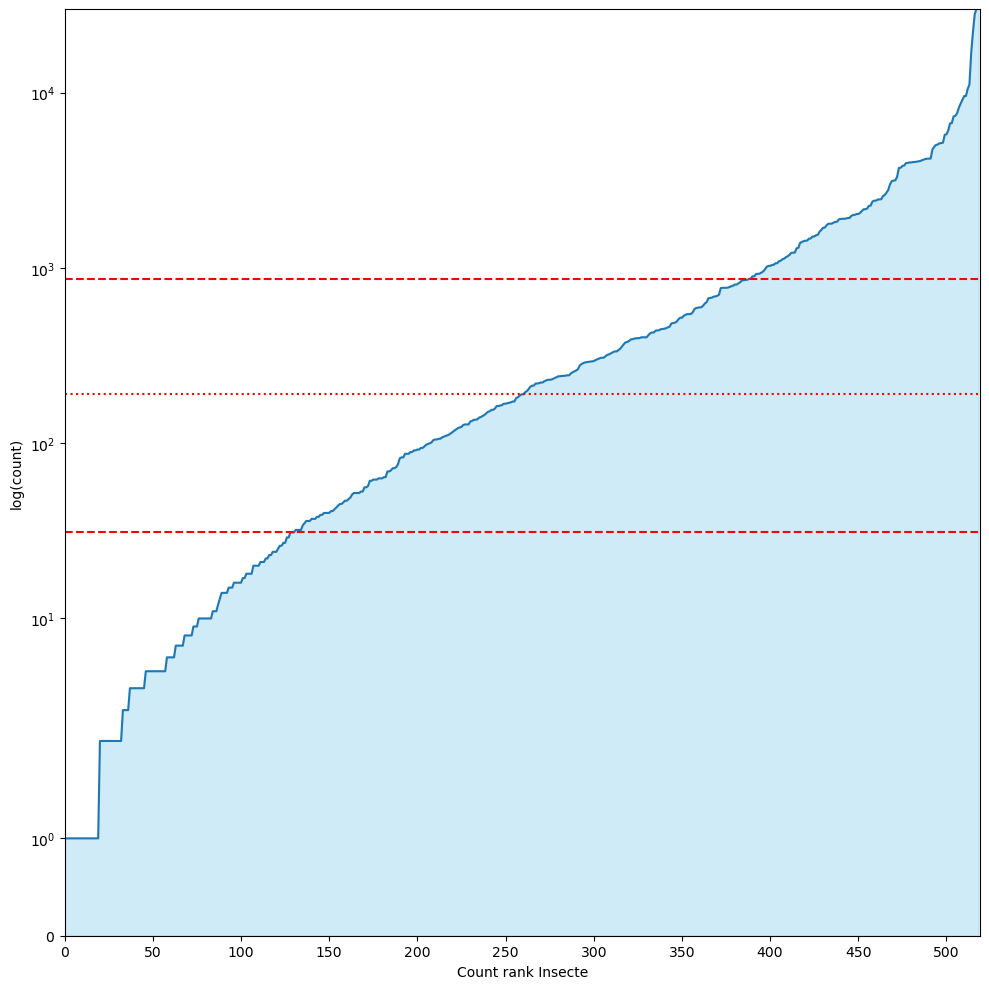

In [46]:
plt.figure(figsize=(10, 10))
x_values = df["insecte_sc"].dropna().value_counts().index
y_values = df["insecte_sc"].dropna().value_counts().values[::-1]
sns.lineplot(x = x_values, y = y_values)

# Fill the area under the curve
plt.fill_between(x_values, y_values, color="skyblue", alpha=0.4)

# Put an xtick each 1000 unique values
plt.xticks(range(0, len(df["insecte_sc"].value_counts()), 50))
# Instead of the label of the xtick, put the position of the xtick
plt.gca().set_xticklabels(range(0, len(df["insecte_sc"].value_counts()), 50))

# Put a line on the quartiles
plt.axhline(y = df["insecte_sc"].value_counts().quantile(0.25), color = "red", linestyle = "--")
plt.axhline(y = df["insecte_sc"].value_counts().quantile(0.50), color = "red", linestyle = ":")
plt.axhline(y = df["insecte_sc"].value_counts().quantile(0.75), color = "red", linestyle = "--")

plt.ylim(0, 30000)
plt.xlim(0, len(df["insecte_sc"].value_counts()))
plt.yscale("symlog")
plt.ylabel("log(count)")
plt.xlabel("Count rank Insecte")
plt.tight_layout()
plt.show()

In [41]:
counts = df["insecte_sc"].dropna().value_counts().sort_index()
counts.min()

1

1/4 des données est très peu représenté sur l'attribut `insecte_sc` `insecte_fr` 

In [33]:
print("insecte_sc")
display(df["insecte_sc"].value_counts().describe())
print("insecte_fr")
display(df["insecte_fr"].value_counts().describe())
print(f"Proportion NA insecte_SC: {df['insecte_sc'].isna().sum() / len(df['insecte_sc']) * 100:.2f}%")
print(f"Proportion NA insecte_FR: {df['insecte_fr'].isna().sum() / len(df['insecte_fr']) * 100:.2f}%")

insecte_sc


count      519.000000
mean      1118.512524
std       3112.357440
min          1.000000
25%         31.000000
50%        190.000000
75%        867.000000
max      37429.000000
Name: count, dtype: float64

insecte_fr


count      579.000000
mean      1149.117444
std       3301.689957
min          1.000000
25%         33.500000
50%        187.000000
75%        886.000000
max      48134.000000
Name: count, dtype: float64

Proportion NA insecte_SC: 13.45%
Proportion NA insecte_FR: 0.81%


Pour la suite, le jeu de donnée est trop grand pour être traité en local. Il faut donc sous échantilloner.

In [10]:
df = df.dropna(subset=['insecte_fr'])

In [11]:
df = df.sample(frac=0.01, random_state=1)


La variable cible n'existe pas dans le jeu de données. Il faut la créer à partir de `insecte_sc` ou `insecte_fr` (ou autre dans le futur).

Pour ça on va regarder autour de chaque observation (wrt. latitude et longitude) si il y a des observations similaires (même `insecte_sc` ou `insecte_fr`). La classe cible sera la quantité d'`insecte_sc` ou `insecte_fr` différents autour de l'observation considérée.


In [12]:
df.shape

(6653, 10)

In [13]:
distance = 0.5

Première intuition

In [14]:
def calculate_unique_insects(row):
    lat = row["latitude"]
    lon = row["longitude"]
    return df[
        (np.abs(df["latitude"] - lat) <= distance) 
        & (np.abs(df["longitude"] - lon) <= distance)
    ]["insecte_fr"].nunique()

# add tqdm to see the progress of the loop in the pandas apply
from tqdm import tqdm
tqdm.pandas()

df["target"] = df.progress_apply(calculate_unique_insects, axis=1)

100%|██████████| 6653/6653 [00:15<00:00, 428.36it/s] 


Deuxième intuition: il faut gagner en vitesse de calcul

In [15]:
from scipy.spatial import cKDTree

# Create a cKDTree from the latitude and longitude
tree = cKDTree(df[['latitude', 'longitude']])

# Define a function to calculate the unique insects within the distance
def calculate_unique_insects(index):
    indices = tree.query_ball_point([df.iloc[index]['latitude'], df.iloc[index]['longitude']], distance)
    return df.iloc[indices]['insecte_fr'].nunique()

# Apply the function to each row
# use tqdm to display a progress bar
from tqdm import tqdm

tqdm.pandas()

df['target'] = [calculate_unique_insects(i) for i in tqdm(range(len(df)))]

100%|██████████| 6653/6653 [00:11<00:00, 563.81it/s]


In [ ]:
!pip install plotly

Carte de France avec uniquement la richesse spécifique autour de chaque observation. 

In [ ]:
import plotly.express as px
fig = px.scatter_geo(df, lat='latitude', lon='longitude', color='target')
fig.update_geos(fitbounds="locations", visible=True)
fig.show()

On peut supposer que cette carte ne traduit en réalité que la densité de population humaine: s'il y a beaucoup d'espèces différentes proche des observations c'est peut-être juste qu'il y a beaucoup d'observations. On va comparer avec une carte de la densité d'échantillonnage.

In [17]:
def calculate_density(row):
    lat = row["latitude"]
    lon = row["longitude"]
    return df[
        (np.abs(df["latitude"] - lat) <= distance) 
        & (np.abs(df["longitude"] - lon) <= distance)
    ].shape[0]

df["density"] = df.apply(calculate_density, axis=1)

In [ ]:
fig = px.scatter_geo(df, lat='latitude', lon='longitude', color='density')
fig.update_geos(fitbounds="locations", visible=True)
fig.show()

In [18]:
df["unique insects weighted"] = df["target"]/df["density"]

In [19]:
df.density.describe()

count    6653.000000
mean      444.918232
std       351.840530
min         2.000000
25%       118.000000
50%       339.000000
75%       838.000000
max       964.000000
Name: density, dtype: float64

En pondérant la target par la densité d'échantillonnage, on devrait avoir une carte plus signficiative de la richesse spécifique. En revanche, la pondération est peut-être trop en défaveur des zones denses: Il y a un nombre d'espèces maximum qui peut se faire effacer par la densité d'échantillonnage.

In [ ]:
fig = px.scatter_geo(df, lat='latitude', lon='longitude', color='unique insects weighted')
fig.update_geos(fitbounds="locations", visible=True)
fig.show()

On va comparer en pondérant plutôt par la densité de collection

In [20]:
# calcule la densité de collection_id, sachant qu'il peut y avoir un même 
# collection_id pour plusieurs lignes
def compute_collection_id_density(row):
    lat = row["latitude"]
    lon = row["longitude"]
    return df[
        (np.abs(df["latitude"] - lat) <= distance) 
        & (np.abs(df["longitude"] - lon) <= distance)
    ]["collection_id"].nunique()
    
# calcule unique insects weighted en divisant target par la quantité d'id collection
df["collection_id density"] = df.progress_apply(compute_collection_id_density, axis=1)

df["unique insects weighted coll"] = df["target"]/df["collection_id density"]

In [ ]:
# plot unique insects weighted coll, and add in the interactive labels the target and the collection_id density
fig = px.scatter_geo(df, lat='latitude', lon='longitude', color='unique insects weighted coll', hover_data=['target', 'collection_id density'])
fig.update_geos(fitbounds="locations", visible=True)
fig.show()

## Pipeline de modélisation

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

In [23]:
X = df[
    [
        "plante_sc",
        "plante_fr",
        "insecte_sc",
        "insecte_fr",
        "temperature",
        "vent",
        "latitude",
        "longitude",
        "nebulosite",
    ]
].copy()
Y = df["unique insects weighted coll"].copy()

Pour gérer les données manquantes, on va utiliser un SimpleImputer qui va remplacer en fonction du KDTree des observations similaires. Cela renforcera la composante spatiale de la target.

In [ ]:
pipeline1 = ColumnTransformer(
    [
        ("num", StandardScaler(), ["temperature", "vent", "latitude", "longitude", "nebulosite"]),
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["plante_fr", "insecte_fr"]),
    ]
)

# add a simple imputer to fill the missing values using the KDtree wrt the latitude and longitude
pipeline2 = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant", fill_value=-1)),
        ("model", RandomForestRegressor()),
    ]
)

pipeline = Pipeline(
    [
        ("preprocessing", pipeline1),
        ("model", pipeline2),
    ]
)
